In [1]:
# IMPORT POTREBNIH BIBLIOTEKA
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models, layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Reshape

In [2]:
if tf.test.gpu_device_name():
    print('GPU je prepoznat:', tf.test.gpu_device_name())
else:
    print('GPU nije prepoznat.')

GPU je prepoznat: /device:GPU:0


In [3]:
#1. Definiranje putanje do glavnog direktorija
base_dir = r'C:\Users\Pc\Ana projekt\dataset'
train_dir = os.path.join(base_dir,'training')
val_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# Class names
class_names = ["Kocka", "Kugla", "Piramida", "Stozac", "Valjak"]

In [4]:
# ImageDataGenerator instances
train_datagen = ImageDataGenerator(
    rescale=1.0/255.,
    rotation_range=45,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

# Data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=64,
    class_mode='categorical',
    shuffle=True
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)


Found 2000 images belonging to 5 classes.
Found 500 images belonging to 5 classes.
Found 750 images belonging to 5 classes.


Training set:


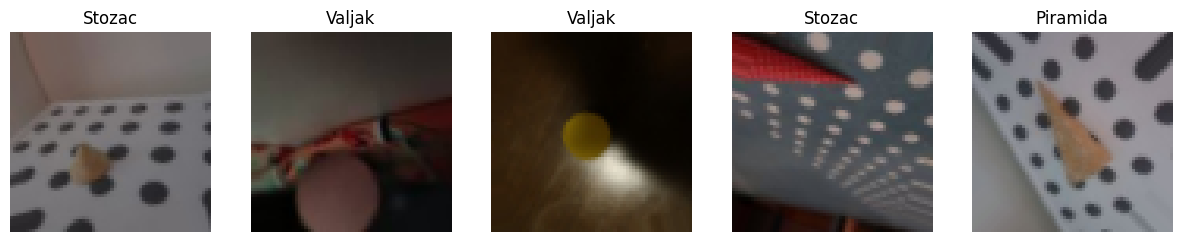

Validation set:


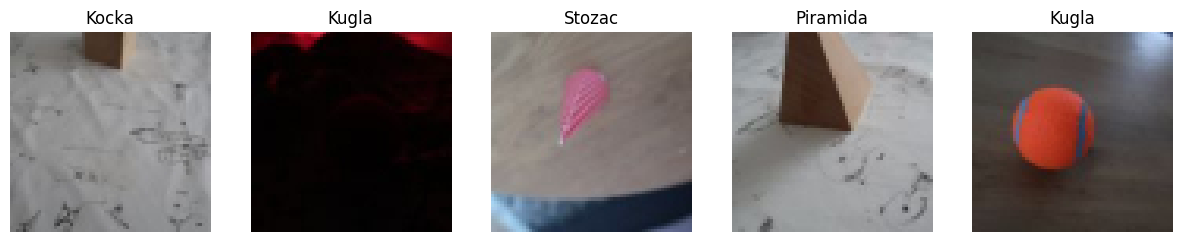

In [5]:
# Function to display images
def show_images(generator, class_names, num_images=5):
    images, labels = next(generator)
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3))
    for i in range(num_images):
        axes[i].imshow(images[i])
        axes[i].set_title(class_names[np.argmax(labels[i])])
        axes[i].axis('off')
    plt.show()


# Display a few images from the training set
print("Training set:")
show_images(train_generator, class_names, num_images=5)

# Display a few images from the validation set
print("Validation set:")
show_images(val_generator, class_names, num_images=5)

# Display a few images from the test set
# print("Test set:")
# show_images(test_generator, class_names, num_images=5)

# GRAFOVI
def plot_model_accuracy(history):
  loss_train = history.history['accuracy']
  loss_val = history.history['val_accuracy']
  epochs = range(1, len(loss_train)+1)
  plt.plot(epochs, loss_train, 'g', label='Training accuracy')
  plt.plot(epochs, loss_val, 'b', label='validation accuracy')
  plt.title('Training and Validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

def plot_model_loss(history):
  loss_train = history.history['loss']
  loss_val = history.history['val_loss']
  epochs = range(1, len(loss_train)+1)
  plt.plot(epochs, loss_train, 'g', label='Training loss')
  plt.plot(epochs, loss_val, 'b', label='validation loss')
  plt.title('Training and Validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

In [6]:
# Definisanje modela
model1 = Sequential()

# Prvi konvolucijski sloj
model1.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3)))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(layers.Dropout(0.2))

# Drugi konvolucijski sloj
model1.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(layers.Dropout(0.2))

# Treći konvolucijski sloj
model1.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(layers.Dropout(0.2))

# Flatten sloj za izravnjavanje rezultata iz konvolucionih slojeva
model1.add(Flatten())

# Fully connected sloj
model1.add(Dense(32, activation='relu'))

# Dodavanje Dropout sloja za smanjenje overfitting-a
model1.add(Dropout(0.5))

# Izlazni sloj
model1.add(Dense(5, activation='softmax'))

# Kompilacija modela
optimizer = Adam(learning_rate=0.0003)
model1.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping
callback = EarlyStopping(monitor='loss', patience=10, mode='min')

# Prikaz modela
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 64)        0

In [7]:
# Treniranje modela sa EarlyStopping callback-om
history = model1.fit(train_generator,
                     validation_data=val_generator,
                     steps_per_epoch=len(train_generator),
                     epochs=200,
                     validation_steps=len(val_generator),
                     callbacks=[callback],
                     verbose=2
)

# Save the model
model1.save('Ana-model3.h5')

Epoch 1/200
32/32 - 4s - loss: 1.6056 - accuracy: 0.2385 - val_loss: 1.5998 - val_accuracy: 0.2320 - 4s/epoch - 118ms/step
Epoch 2/200
32/32 - 2s - loss: 1.5793 - accuracy: 0.2520 - val_loss: 1.5700 - val_accuracy: 0.2660 - 2s/epoch - 52ms/step
Epoch 3/200
32/32 - 2s - loss: 1.5540 - accuracy: 0.2690 - val_loss: 1.5439 - val_accuracy: 0.3300 - 2s/epoch - 53ms/step
Epoch 4/200
32/32 - 2s - loss: 1.5485 - accuracy: 0.2895 - val_loss: 1.5281 - val_accuracy: 0.3260 - 2s/epoch - 54ms/step
Epoch 5/200
32/32 - 2s - loss: 1.5375 - accuracy: 0.2960 - val_loss: 1.5282 - val_accuracy: 0.3220 - 2s/epoch - 56ms/step
Epoch 6/200
32/32 - 2s - loss: 1.5278 - accuracy: 0.2925 - val_loss: 1.5117 - val_accuracy: 0.3440 - 2s/epoch - 56ms/step
Epoch 7/200
32/32 - 2s - loss: 1.5220 - accuracy: 0.3145 - val_loss: 1.5033 - val_accuracy: 0.3540 - 2s/epoch - 55ms/step
Epoch 8/200
32/32 - 2s - loss: 1.5059 - accuracy: 0.3315 - val_loss: 1.4831 - val_accuracy: 0.3940 - 2s/epoch - 57ms/step
Epoch 9/200
32/32 - 2s 

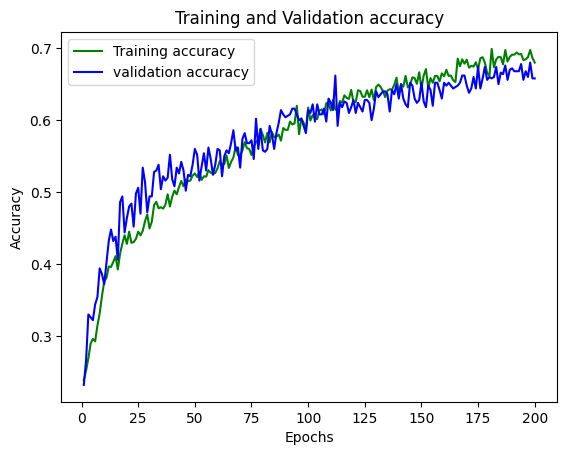

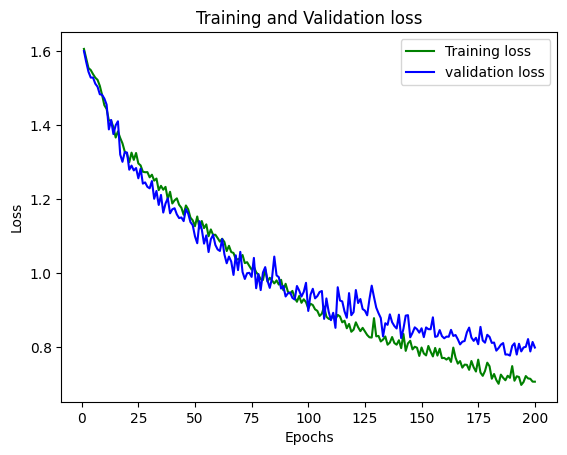

In [8]:
plot_model_accuracy(history)
plot_model_loss(history)